# Data Science Project: Using Cluster Analysis to Investigate Australia Suburb Similarity

## Group 36
* Isha Ahsan - 
* Mohammed Fardeen (45496277) 
* Prekshya Chand (46487626)
* Rijwa Abbas (45697795)

## Introduction

-- gist of our project, revisit our main goals, talk a little bit about our datasets (to be added later)

### Importing libraries

In [56]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import scipy.cluster.hierarchy as sc




##add necessary libraries as we progress further

In [2]:
#reading the income & rent data 
income = pd.read_csv("Data files/IncomeandRent2016Analysis.csv")
income.head()

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
0,2000,24207,68607,25828,20465,52595,26186,2608,492,-420,...,22080,1395,197860,14998,14304,35296,8571,44616,88340,1219
1,2006,79,82018,53192,66,84414,69154,20,4368,4148,...,37440,3,41247,37177,57,32740,19577,120,98720,19776
2,2007,4879,47040,31049,4275,47486,33284,519,-1026,-1654,...,18532,320,149251,8214,3099,16119,9233,6952,42250,4267
3,2008,6025,82162,40289,5372,53977,42505,670,61,-906,...,18000,494,30197,7579,4244,36981,10972,8081,55885,9029
4,2009,9763,84475,52414,8179,75281,56378,1679,-2595,-1393,...,23795,673,93747,10851,7373,32797,15451,12889,131020,19841


In [3]:
print(income.columns)

Index(['Postcode', 'Count taxable income or loss',
       'Average taxable income or loss', 'Median taxable income or loss',
       'Count salary and wages', 'Average salary and wages',
       'Median salary and wages', 'Count net rent', 'Average net rent',
       'Median net rent', 'Count total income or loss',
       'Average total income or loss', 'Median total income or loss',
       'Count total deductions', 'Average total deductions',
       'Median total deductions', 'Count total business income',
       'Average total business income', 'Median total business income',
       'Count  total business expenses', 'Average total business expenses',
       'Median total business expenses', 'Count net tax', 'Average net tax',
       'Median net tax', 'Count super total accounts balance',
       'Average super total accounts balance',
       'Median super total accounts balance'],
      dtype='object')


In [4]:
df0 = income.sort_values("Average taxable income or loss", ascending = True)
df0.head(10)


,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
976,3482,98,15411,20310,52,26502,20289,7,6989,8371,...,44116,10,57825,34492,42,7641,5967,92,141827,28700
1215,3889,82,21540,18998,33,33400,29960,11,1049,-22,...,18604,9,42736,30324,32,5959,3238,92,46663,20063
236,2308,136,22119,14720,122,18338,11462,3,-6928,-6883,...,44983,1,41594,41594,44,8039,1416,175,22586,1272
1004,3542,108,22520,19133,40,34778,31068,4,2859,2,...,42494,6,60091,47376,51,7853,7050,102,111156,29363
289,2386,216,23641,34008,126,40952,39392,28,-12426,454,...,28819,25,69893,32767,138,11370,7503,206,80731,32699
924,3391,79,24261,23127,39,36761,33455,12,3612,702,...,35128,11,58543,34593,45,8656,3495,88,130891,34995
829,3237,120,24641,20451,64,29705,24954,16,5327,4620,...,30300,26,29262,14290,56,6080,4028,140,105106,28904
1565,4611,63,25366,19028,37,34901,29722,3,-840,-849,...,118639,7,144234,110663,28,8364,2966,67,55282,24897
998,3527,412,26092,23768,243,38049,34412,52,526,12,...,34866,54,91816,25117,211,8589,6085,438,106602,45031
1876,5269,110,26112,32082,74,37555,35112,17,3785,4928,...,11560,7,36370,6080,73,8190,4989,129,48773,20126


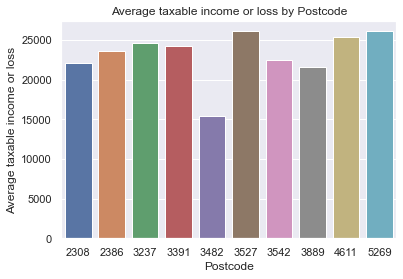

In [5]:
sns.barplot(data=df0.head(10), x="Postcode", y="Average taxable income or loss")
plt.title('Average taxable income or loss by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Average taxable income or loss')
plt.show()

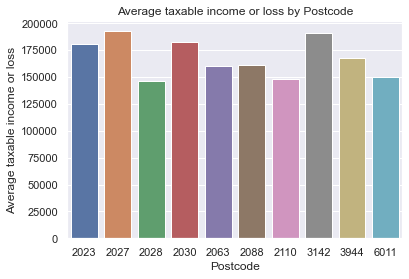

In [6]:
sns.barplot(data=df0.tail(10), x="Postcode", y="Average taxable income or loss")
plt.title('Average taxable income or loss by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Average taxable income or loss')
plt.show()

In [7]:
df1 = income.sort_values("Average net rent", ascending = True)
df1.head(10)

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
2307,6635,94,46721,39410,78,56106,48475,11,-47930,-11513,...,802,7,33642,1073,69,13555,9093,144,49322,15269
2010,5724,113,39940,32858,92,40865,30726,6,-15314,-5295,...,63662,8,351046,26928,68,9407,5402,137,42458,10724
289,2386,216,23641,34008,126,40952,39392,28,-12426,454,...,28819,25,69893,32767,138,11370,7503,206,80731,32699
1598,4709,500,99013,88929,464,110332,105918,188,-10958,-8693,...,45870,19,56792,16821,395,37343,38232,611,117153,61460
1448,4364,215,68908,47292,130,47180,44158,36,-10809,-304,...,74184,13,64534,29610,164,23820,13037,218,157387,45786
1640,4801,182,39175,33758,181,40698,34266,11,-10808,-6188,...,61794,2,39919,39919,145,7707,5103,279,21638,6163
1580,4662,290,38391,34074,201,44945,40100,37,-10646,-2007,...,16509,24,30618,15554,185,10157,6501,382,72823,27651
1628,4744,4589,86924,73911,4218,95146,85284,1433,-10637,-7367,...,21276,220,57842,14666,3765,29372,25126,5500,115706,62087
2321,6722,5680,81785,71952,5357,87080,78338,1477,-10195,-7520,...,22932,209,36820,9132,4738,25709,21224,7595,68390,32148
2329,6754,759,97725,111291,723,105273,119247,282,-9672,-6552,...,28495,32,42503,11120,645,32539,35834,919,107300,67064


In [8]:
df1.tail(10)

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
2164,6256,67,50455,34853,43,53427,44002,6,10216,11918,...,34668,12,33564,20238,41,18870,14107,71,87418,29647
1264,3958,170,33832,28574,102,35469,31828,9,11255,-18,...,65730,19,94958,28317,100,9370,7100,165,125864,31420
614,2898,297,49157,41602,237,41053,35601,49,11270,6472,...,19872,43,85587,11007,216,12411,8003,302,118099,38445
854,3278,179,42340,34883,131,43286,38153,16,11809,5139,...,38784,19,116213,13372,126,10305,8238,202,101280,33715
1185,3833,154,37728,24310,96,44243,36909,11,12514,4103,...,30278,23,31988,17804,88,10788,7238,171,89754,41319
844,3267,182,34803,27964,103,35965,30510,25,12994,2176,...,29190,25,56667,16300,114,9035,4146,183,88582,23921
541,2775,798,54498,39591,590,50921,44347,124,13876,2442,...,33986,123,82490,17918,583,17107,8872,964,100486,40808
2238,6423,102,60067,50218,74,64773,53160,13,19727,-2227,...,68965,11,491433,48520,78,17504,12697,118,81833,36332
2391,7213,119,30836,24964,92,36521,28274,9,20461,2000,...,30044,15,56714,16806,70,7532,4541,147,47161,17652
946,3433,145,61014,47686,110,59207,49682,25,28970,-972,...,29900,22,55510,12866,117,18216,10723,145,131803,71416


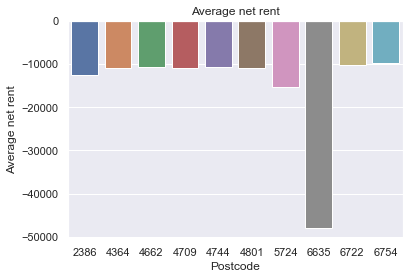

In [9]:
sns.barplot(data=df1.head(10), x="Postcode", y="Average net rent")
plt.title('Average net rent')
plt.xlabel('Postcode')
plt.ylabel('Average net rent')
plt.show()

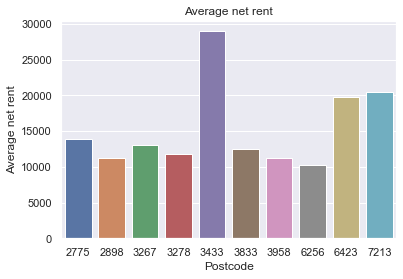

In [10]:
sns.barplot(data=df1.tail(10), x="Postcode", y="Average net rent")
plt.title('Average net rent')
plt.xlabel('Postcode')
plt.ylabel('Average net rent')
plt.show()

## Merging Demographics dataset

In [11]:
demo = pd.read_csv("Data files/Demographics.csv")
demo.head()

,Postcode,0-9 years,10-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60-69 years,70-79 years,80-89 years,...,Other Religions,Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation,Inadequately described,Not stated,Never married,Widowed,Divorced,Separated,Married,Not applicable
0,800,424,230,1939,1691,819,752,457,126,33,...,49,2294,48,1183,3034,76,458,177,2182,536
1,810,4840,3746,5181,6091,4882,3798,2861,1408,434,...,365,10122,219,4098,10521,892,2073,811,12254,6752
2,812,2753,2541,2504,2911,2696,2664,1862,734,190,...,136,5667,114,2292,5744,489,1289,507,6777,4069
3,820,2104,1803,3723,3812,2845,2442,1718,695,249,...,150,6751,135,2561,7171,446,1458,457,6860,3051
4,822,4381,4454,4081,4109,3443,2831,1613,532,109,...,1108,4253,60,3660,8203,854,940,500,8394,6664


In [12]:
#merging columns for simplicity

#Age group

demo['Kids and Teens']= demo['0-9 years'] + demo['10-19 years']
demo['Adults']= demo['20-29 years'] + demo['30-39 years'] + demo['40-49 years'] + demo['50-59 years'] 
demo['Seniors']= demo['60-69 years'] + demo['70-79 years'] + demo['80-89 years'] + demo['90-99 years'] + demo['100 years and over']

#Marital Status
demo['Single']= demo['Never married'] + demo['Widowed'] + demo['Divorced'] + demo ['Separated']

#Religious Affiliation 
demo['Not stated/described'] = demo['Inadequately described'] + demo['Not stated']


In [13]:
#dropping columns that have been merged

demo = demo.drop(['0-9 years','10-19 years','20-29 years','30-39 years','40-49 years','50-59 years','60-69 years','70-79 years','80-89 years','90-99 years','100 years and over','Never married','Widowed', 'Divorced', 'Separated', 'Inadequately described', 'Not stated'], axis = 1)


#changing column name

demo = demo.rename(columns={"Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation":"No Religious Affiliation"})
demo.head()

,Postcode,Male,Female,Buddhism,Christianity,Hinduism,Islam,Judaism,Other Religions,No Religious Affiliation,Married,Not applicable,Kids and Teens,Adults,Seniors,Single,Not stated/described
0,800,3629,2835,274,2226,295,94,7,49,2294,2182,536,654,5201,620,3745,1231
1,810,16776,16530,1142,15094,1386,839,33,365,10122,12254,6752,8586,19952,4770,14297,4317
2,812,9442,9429,692,9404,247,318,9,136,5667,6777,4069,5294,10775,2800,8029,2406
3,820,10205,9249,519,8636,426,260,12,150,6751,6860,3051,3907,12822,2719,9532,2696
4,822,13146,12414,216,16234,18,16,4,1108,4253,8394,6664,8835,14464,2258,10497,3720


In [14]:
# Reordering the columns

demo = demo [['Postcode','Kids and Teens', 'Adults', 'Seniors', 'Male', 'Female', 'Buddhism', 'Christianity', 'Hinduism', 'Islam', 'Judaism', 'Other Religions', 'No Religious Affiliation', 'Not stated/described', 'Single', 'Married', 'Not applicable']]
demo.head()


,Postcode,Kids and Teens,Adults,Seniors,Male,Female,Buddhism,Christianity,Hinduism,Islam,Judaism,Other Religions,No Religious Affiliation,Not stated/described,Single,Married,Not applicable
0,800,654,5201,620,3629,2835,274,2226,295,94,7,49,2294,1231,3745,2182,536
1,810,8586,19952,4770,16776,16530,1142,15094,1386,839,33,365,10122,4317,14297,12254,6752
2,812,5294,10775,2800,9442,9429,692,9404,247,318,9,136,5667,2406,8029,6777,4069
3,820,3907,12822,2719,10205,9249,519,8636,426,260,12,150,6751,2696,9532,6860,3051
4,822,8835,14464,2258,13146,12414,216,16234,18,16,4,1108,4253,3720,10497,8394,6664


## Religious Affiliation

In [15]:
# dropping columns not related to religious affiliation 

cols = [1,2,3,4,5,14,15,16]
demo_rel = demo.drop(demo.columns[cols], axis = 1)
demo_rel.head(10)

,Postcode,Buddhism,Christianity,Hinduism,Islam,Judaism,Other Religions,No Religious Affiliation,Not stated/described
0,800,274,2226,295,94,7,49,2294,1231
1,810,1142,15094,1386,839,33,365,10122,4317
2,812,692,9404,247,318,9,136,5667,2406
3,820,519,8636,426,260,12,150,6751,2696
4,822,216,16234,18,16,4,1108,4253,3720
5,828,26,494,21,13,0,20,390,244
6,829,10,399,4,6,0,0,338,1083
7,830,423,8328,221,188,7,92,6461,2487
8,832,280,7478,341,228,0,116,5636,1489
9,835,70,2105,14,20,0,11,1379,1525


## Exploring the dataset : Religious Affiliation

In [16]:
demo_rel.describe()

,Postcode,Buddhism,Christianity,Hinduism,Islam,Judaism,Other Religions,No Religious Affiliation,Not stated/described
count,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000
mean,4094.410599,270.192961,4554.999191,498.359223,240.868123,47.985032,81.833738,2553.961165,1072.875000
std,1496.667668,718.837013,6853.428035,1525.616565,995.173722,284.371032,266.569957,3640.891934,1473.509131
min,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2839.750000,6.000000,300.000000,0.000000,0.000000,0.000000,0.000000,157.000000,124.750000
50%,3869.500000,46.500000,1554.500000,18.000000,7.000000,0.000000,11.000000,812.000000,480.500000
75%,5165.250000,267.250000,6519.500000,260.500000,100.250000,14.000000,67.000000,3822.500000,1465.500000
max,7470.000000,20631.000000,69539.000000,18314.000000,16053.000000,6319.000000,5271.000000,27107.000000,14788.000000


In [17]:
demo_rel.sum()

Postcode                    10121383
Buddhism                      667917
Christianity                11259958
Hinduism                     1231944
Islam                         595426
Judaism                       118619
Other Religions               202293
No Religious Affiliation     6313392
Not stated/described         2652147
dtype: int64

In [18]:
demo_rel_head = demo_rel.head(10)
demo_rel_head

,Postcode,Buddhism,Christianity,Hinduism,Islam,Judaism,Other Religions,No Religious Affiliation,Not stated/described
0,800,274,2226,295,94,7,49,2294,1231
1,810,1142,15094,1386,839,33,365,10122,4317
2,812,692,9404,247,318,9,136,5667,2406
3,820,519,8636,426,260,12,150,6751,2696
4,822,216,16234,18,16,4,1108,4253,3720
5,828,26,494,21,13,0,20,390,244
6,829,10,399,4,6,0,0,338,1083
7,830,423,8328,221,188,7,92,6461,2487
8,832,280,7478,341,228,0,116,5636,1489
9,835,70,2105,14,20,0,11,1379,1525


<ipython-input-19-bcc0a86e06b1>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  demo_rel_head.groupby("Postcode")["Buddhism","Christianity","Hinduism","Islam","Judaism", "Other Religions", "No Religious Affiliation",  "Not stated/described"].agg(lambda x: sum(x)).plot(kind= "bar")


<Figure size 1080x864 with 0 Axes>

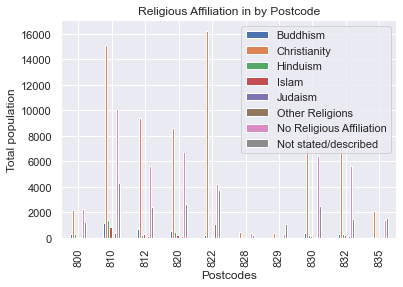

In [19]:
# Plotting religious affiliation by first 10 postcode in Aus 

plt.figure(figsize= (15, 12))
demo_rel_head.groupby("Postcode")["Buddhism","Christianity","Hinduism","Islam","Judaism", "Other Religions", "No Religious Affiliation",  "Not stated/described"].agg(lambda x: sum(x)).plot(kind= "bar")
plt.title('Religious Affiliation in by Postcode')
plt.xlabel('Postcodes')
plt.xticks( rotation='vertical')
plt.ylabel('Total population')
plt.show()

In [20]:
demo_rel_tail = demo_rel.tail(10)
demo_rel_tail

,Postcode,Buddhism,Christianity,Hinduism,Islam,Judaism,Other Religions,No Religious Affiliation,Not stated/described
2462,7320,21,2296,6,6,5,6,1744,594
2463,7321,17,2060,5,0,0,20,1394,404
2464,7322,53,4468,15,7,0,35,3186,826
2465,7325,18,3744,5,0,0,22,2116,672
2466,7330,0,305,0,0,0,3,178,63
2467,7331,6,1091,0,4,0,8,509,174
2468,7467,0,359,0,0,0,3,282,62
2469,7468,4,366,0,0,0,6,307,82
2470,7469,0,356,8,0,0,0,251,92
2471,7470,0,356,8,0,0,0,251,92


In [21]:
demo.head()

,Postcode,Kids and Teens,Adults,Seniors,Male,Female,Buddhism,Christianity,Hinduism,Islam,Judaism,Other Religions,No Religious Affiliation,Not stated/described,Single,Married,Not applicable
0,800,654,5201,620,3629,2835,274,2226,295,94,7,49,2294,1231,3745,2182,536
1,810,8586,19952,4770,16776,16530,1142,15094,1386,839,33,365,10122,4317,14297,12254,6752
2,812,5294,10775,2800,9442,9429,692,9404,247,318,9,136,5667,2406,8029,6777,4069
3,820,3907,12822,2719,10205,9249,519,8636,426,260,12,150,6751,2696,9532,6860,3051
4,822,8835,14464,2258,13146,12414,216,16234,18,16,4,1108,4253,3720,10497,8394,6664


<ipython-input-22-67d7543b4862>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  demo_rel_tail.groupby("Postcode")["Buddhism","Christianity","Hinduism","Islam","Judaism", "Other Religions", "No Religious Affiliation",  "Not stated/described"].agg(lambda x: sum(x)).plot(kind= "bar")


<Figure size 1080x864 with 0 Axes>

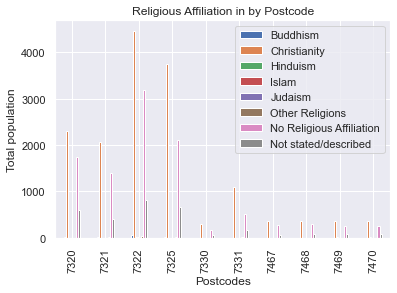

In [22]:
# Plotting religious affiliation by last 10 postcode in Aus

plt.figure(figsize= (15, 12))
demo_rel_tail.groupby("Postcode")["Buddhism","Christianity","Hinduism","Islam","Judaism", "Other Religions", "No Religious Affiliation",  "Not stated/described"].agg(lambda x: sum(x)).plot(kind= "bar")
plt.title('Religious Affiliation in by Postcode')
plt.xlabel('Postcodes')
plt.xticks( rotation='vertical')
plt.ylabel('Total population')
plt.show()

# PCA ANALYSIS DEMOGRAPHICS

In [23]:
demo.describe()

,Postcode,Kids and Teens,Adults,Seniors,Male,Female,Buddhism,Christianity,Hinduism,Islam,Judaism,Other Religions,No Religious Affiliation,Not stated/described,Single,Married,Not applicable
count,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000
mean,4094.410599,2306.949434,5033.539644,1993.224919,4602.199434,4731.743528,270.192961,4554.999191,498.359223,240.868123,47.985032,81.833738,2553.961165,1072.875000,3931.119741,3646.538430,1738.259709
std,1496.667668,3362.469271,6925.726768,2598.905790,6173.387773,6415.891468,718.837013,6853.428035,1525.616565,995.173722,284.371032,266.569957,3640.891934,1473.509131,5285.780468,4974.047746,2570.103033
min,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2839.750000,209.000000,443.000000,230.750000,462.750000,427.500000,6.000000,300.000000,0.000000,0.000000,0.000000,0.000000,157.000000,124.750000,347.250000,357.000000,152.000000
50%,3869.500000,908.500000,1913.000000,977.000000,1971.000000,1947.000000,46.500000,1554.500000,18.000000,7.000000,0.000000,11.000000,812.000000,480.500000,1566.500000,1577.500000,684.000000
75%,5165.250000,3091.500000,7113.000000,2876.250000,6671.500000,6953.000000,267.250000,6519.500000,260.500000,100.250000,14.000000,67.000000,3822.500000,1465.500000,5767.500000,5124.000000,2294.750000
max,7470.000000,30230.000000,57777.000000,25002.000000,52026.000000,55742.000000,20631.000000,69539.000000,18314.000000,16053.000000,6319.000000,5271.000000,27107.000000,14788.000000,46068.000000,42099.000000,24484.000000


In [24]:
#find Q1, Q3, and interquartile range for each column
Q1 = demo.quantile(q=.25)
Q3 = demo.quantile(q=.75)
IQR = demo.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
demo_clean = demo[~((demo < (Q1-1.5*IQR)) | (demo > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
demo_clean.shape



(1675, 17)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(demo_clean)
scaled_data=scaler.transform(demo_clean)
scaled_data

array([[-2.27723525, -0.23026797,  1.25826501, ...,  1.01707941,
         0.34058851, -0.18318079],
       [-2.25868831, -0.43218413, -0.51513739, ..., -0.48362546,
        -0.58351919, -0.48455912],
       [-2.25802591, -0.62318591, -0.12096193, ..., -0.20540224,
        -0.45518522, -0.68513514],
       ...,
       [ 2.13958764, -0.61071232, -0.59451458, ..., -0.58518402,
        -0.65052087, -0.58124704],
       [ 2.14025003, -0.60525513, -0.60032266, ..., -0.59841025,
        -0.66185961, -0.58844721],
       [ 2.14091242, -0.60525513, -0.60032266, ..., -0.59841025,
        -0.66185961, -0.58844721]])

In [26]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [27]:
pca.explained_variance_ratio_

array([7.44245511e-01, 8.02851254e-02, 5.87040363e-02, 3.40086325e-02,
       3.16537347e-02, 1.29345729e-02, 1.14794770e-02, 8.72728008e-03,
       8.66382098e-03, 4.17258365e-03, 2.15050346e-03, 1.91972905e-03,
       6.79025570e-04, 2.86812576e-04, 8.74397622e-05, 1.58782916e-06,
       1.27138250e-07])

Text(0, 0.5, 'Cumulative Explained Variance')

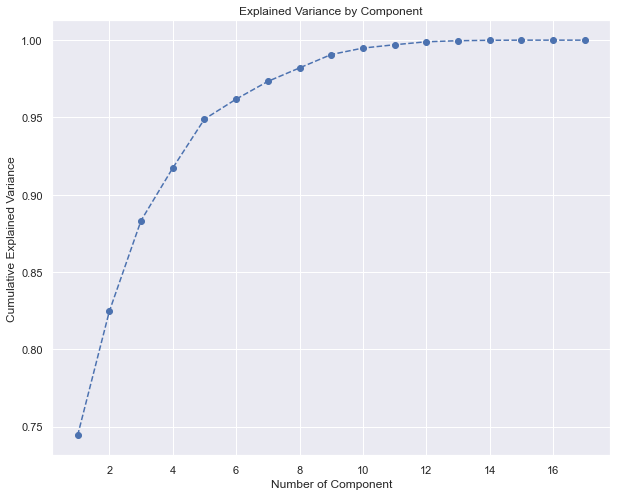

In [28]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle  = '--')
plt.title ('Explained Variance by Component')
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance')

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(scaled_data)
pca_data_demo=pca.transform(scaled_data)
pca_data_demo.shape

(1675, 4)

Text(0, 0.5, 'second principal component')

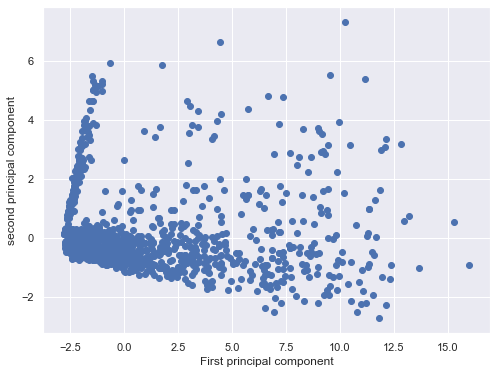

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data_demo[:,0],pca_data_demo[:,1])
plt.xlabel('First principal component')
plt.ylabel('second principal component')


## K Means Clustering demographics

In [47]:
wcss = []

for i in range (1, 21):
    kmeans_demo = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_demo.fit(pca_data_demo)
    wcss.append(kmeans_demo.inertia_)

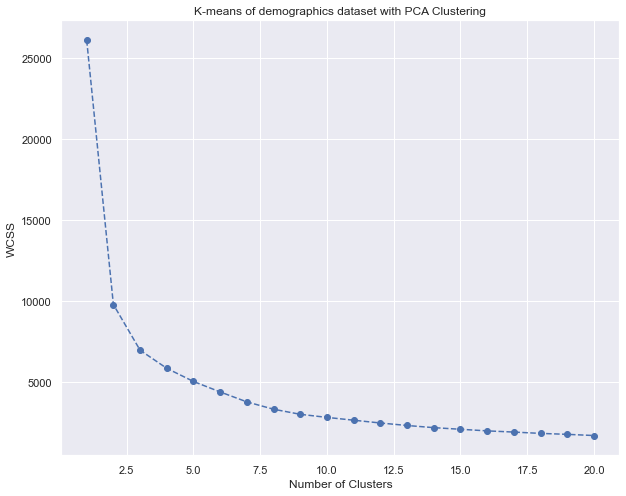

In [48]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means of demographics dataset with PCA Clustering')
plt.show()

In [49]:
kmeans_pca_demo = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca_demo.fit(pca_data_demo)

KMeans(n_clusters=4, random_state=42)

In [50]:
df_segm_pca_kmeans_demo = pd.concat([demo_clean.reset_index(drop = True), pd.DataFrame(pca_data_demo)], axis =1)
df_segm_pca_kmeans_demo.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_segm_pca_kmeans_demo['Segment K-means PCA'] = kmeans_pca_demo.labels_

In [51]:
df_segm_pca_kmeans_demo.head()

,Postcode,Kids and Teens,Adults,Seniors,Male,Female,Buddhism,Christianity,Hinduism,Islam,...,No Religious Affiliation,Not stated/described,Single,Married,Not applicable,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,800,654,5201,620,3629,2835,274,2226,295,94,...,2294,1231,3745,2182,536,3.397762,3.767681,-3.057814,-0.627255,2
1,828,395,621,199,627,572,26,494,21,13,...,390,244,568,389,243,-1.567258,-0.373507,-2.247195,-0.500891,3
2,829,150,1639,60,1578,264,10,399,4,6,...,338,1083,1157,638,48,-1.258489,-0.751282,-1.997982,-0.692012,3
3,830,5712,10762,1744,9229,8979,423,8328,221,188,...,6461,2487,7944,5750,4512,12.082405,3.080871,-2.564080,-1.342602,1
4,832,5047,9657,872,7811,7761,280,7478,341,228,...,5636,1489,6126,5256,4197,9.950630,3.929652,-2.784280,-2.419584,1


In [52]:
df_segm_pca_kmeans_demo['Segment'] = df_segm_pca_kmeans_demo['Segment K-means PCA'].map({0: 'first',
                                                                              1: 'second',
                                                                              2: 'third',
                                                                              3: 'fourth'}
                                                                                       )

/Users/mohammedfardeen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


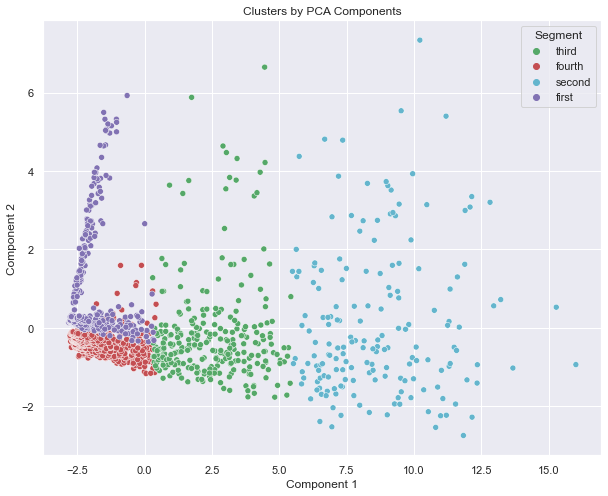

In [53]:
x_axis = df_segm_pca_kmeans_demo['Component 1']
y_axis = df_segm_pca_kmeans_demo['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans_demo['Segment'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

## Hierarchical Clustering: Demographics

In [54]:
dist = pdist(scaled_data, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

Text(0, 0.5, 'Euclidean distance')

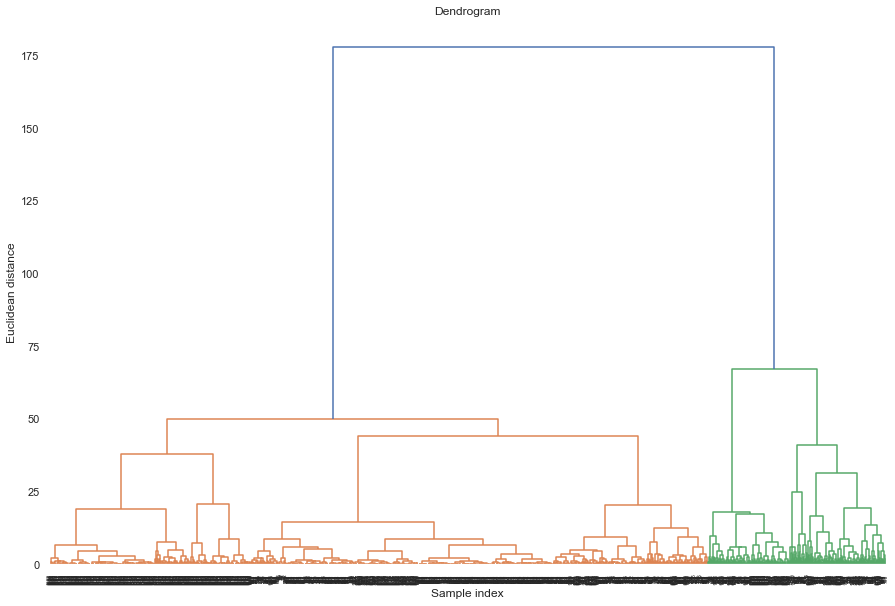

In [57]:
# Plot dendrogram
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(pca_data_demo, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [58]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit(pca_data_demo)
labels = cluster.labels_
labels

array([0, 1, 1, ..., 1, 1, 1])

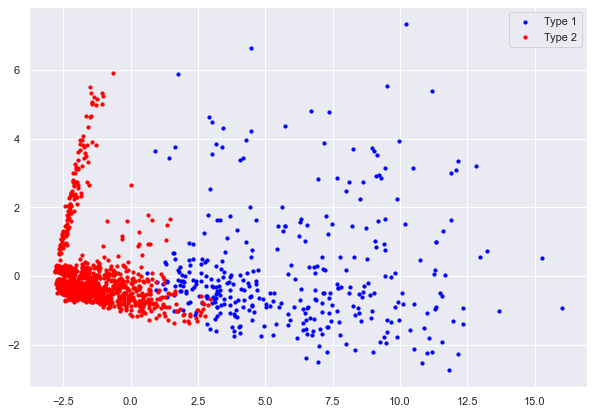

In [59]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data_demo[labels == 0, 0], pca_data_demo[labels == 0, 1], s = 10, c = 'blue', label = 'Type 1')
plt.scatter(pca_data_demo[labels == 1, 0], pca_data_demo[labels == 1, 1], s = 10, c = 'red', label = 'Type 2')
plt.legend()
plt.show()

# PCA ANALYSIS ALL DATA

In [31]:
new_income = income[['Postcode','Median taxable income or loss', 'Median salary and wages','Median net rent','Median total income or loss','Median total deductions','Median total business income', 'Median total business expenses', 'Median net tax','Median super total accounts balance']]
new_income.head()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219
1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776
2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267
3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029
4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841


In [32]:
demo.head()

,Postcode,Kids and Teens,Adults,Seniors,Male,Female,Buddhism,Christianity,Hinduism,Islam,Judaism,Other Religions,No Religious Affiliation,Not stated/described,Single,Married,Not applicable
0,800,654,5201,620,3629,2835,274,2226,295,94,7,49,2294,1231,3745,2182,536
1,810,8586,19952,4770,16776,16530,1142,15094,1386,839,33,365,10122,4317,14297,12254,6752
2,812,5294,10775,2800,9442,9429,692,9404,247,318,9,136,5667,2406,8029,6777,4069
3,820,3907,12822,2719,10205,9249,519,8636,426,260,12,150,6751,2696,9532,6860,3051
4,822,8835,14464,2258,13146,12414,216,16234,18,16,4,1108,4253,3720,10497,8394,6664


In [33]:
Merge_df=(demo.merge(new_income))
Merge_df.head()

,Postcode,Kids and Teens,Adults,Seniors,Male,Female,Buddhism,Christianity,Hinduism,Islam,...,Not applicable,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,800,654,5201,620,3629,2835,274,2226,295,94,...,536,50892,53089,-4522,52896,721,30219,11993,13453,21447
1,810,8586,19952,4770,16776,16530,1142,15094,1386,839,...,6752,54306,58373,-3468,56833,1126,32728,14419,12991,41362
2,812,5294,10775,2800,9442,9429,692,9404,247,318,...,4069,55473,59581,-3868,57826,1065,36028,17570,12840,50663
3,820,3907,12822,2719,10205,9249,519,8636,426,260,...,3051,62522,65435,-3872,65575,1357,24360,9944,15169,47312
4,822,8835,14464,2258,13146,12414,216,16234,18,16,...,6664,34348,33624,-2444,35126,375,28346,12842,7136,18336


In [34]:
#find Q1, Q3, and interquartile range for each column
Q1 = Merge_df.quantile(q=.25)
Q3 = Merge_df.quantile(q=.75)
IQR = Merge_df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
Merge_df_clean = Merge_df[~((Merge_df < (Q1-1.5*IQR)) | (Merge_df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
Merge_df_clean.shape



(1325, 26)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Merge_df_clean)
scaled_merge_data=scaler.transform(Merge_df_clean)
scaled_merge_data

array([[-2.31829695, -0.28074923,  1.1636988 , ..., -1.04514663,
         1.81307612, -1.88114634],
       [-2.29468595, -0.18526122,  0.57777533, ...,  0.32963462,
         2.45223898,  2.02918935],
       [-2.29401135,  0.94104622,  0.90803673, ...,  0.58205159,
         2.08323343,  1.33328558],
       ...,
       [ 2.17993623, -0.6476638 , -0.63005923, ..., -0.31894474,
         0.42961942,  0.40236876],
       [ 2.18061083, -0.64240068, -0.6356823 , ..., -0.93503763,
         0.85977686, -0.72410931],
       [ 2.18128543, -0.64240068, -0.6356823 , ...,  1.11347843,
         3.52072159,  0.30867075]])

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_merge_data)

PCA()

In [37]:
pca.explained_variance_ratio_

array([5.17245224e-01, 1.64678473e-01, 6.60730111e-02, 4.69638360e-02,
       4.24151353e-02, 3.25494029e-02, 2.58854313e-02, 1.92512372e-02,
       1.66043555e-02, 1.51769445e-02, 1.23287774e-02, 8.43180594e-03,
       7.04215478e-03, 5.87662549e-03, 5.39728478e-03, 4.46515067e-03,
       3.82863050e-03, 2.52099594e-03, 1.19727783e-03, 1.12875523e-03,
       3.97178150e-04, 3.63614303e-04, 1.33471688e-04, 4.43206706e-05,
       8.29706880e-07, 7.61702282e-08])

Text(0, 0.5, 'Cumulative Explained Variance')

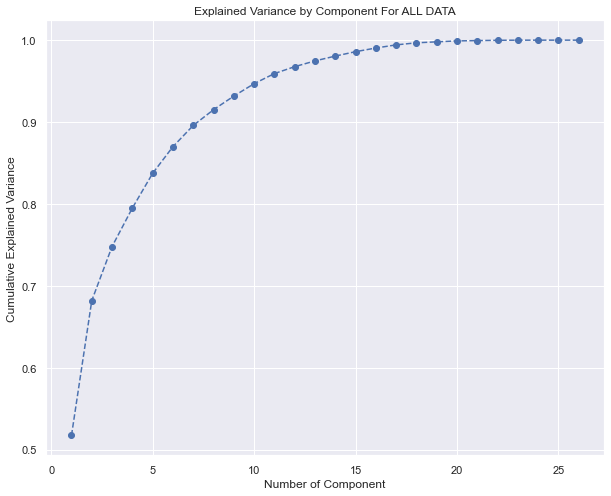

In [38]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,27), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle  = '--')
plt.title ('Explained Variance by Component For ALL DATA')
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance')

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(scaled_merge_data)
merge_pca=pca.transform(scaled_merge_data)
merge_pca.shape

(1325, 5)

In [67]:
merge_pca

array([[ 4.02468505,  2.94250233,  1.46766062,  4.0136727 , -0.88426565],
       [ 2.74482404,  6.24441167, -3.84899894,  0.87735729, -0.39905184],
       [ 4.1678756 ,  4.93344842, -3.81971044,  0.77511104, -0.60934933],
       ...,
       [-1.99400268,  2.06282855,  1.21498813, -1.14123852, -0.58756987],
       [-2.05237398,  2.04045081,  1.45800445, -1.09378879, -0.46319116],
       [-0.97067485,  6.06004895,  0.25725146, -1.12212721, -1.04313749]])

Text(0, 0.5, 'second principal component')

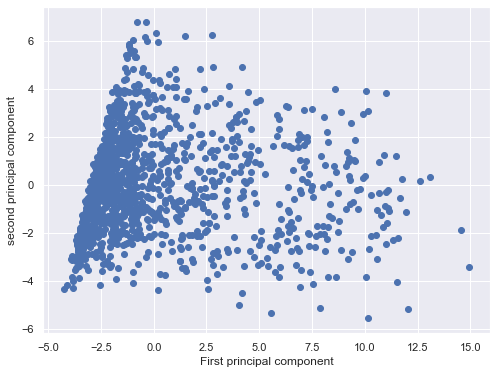

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(merge_pca[:,0],merge_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('second principal component')



## K means clustering : ALL Dataset

## Hierarchial clustering : ALL Dataset

In [69]:
dist = pdist(merge_pca, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

Text(0, 0.5, 'Euclidean distance')

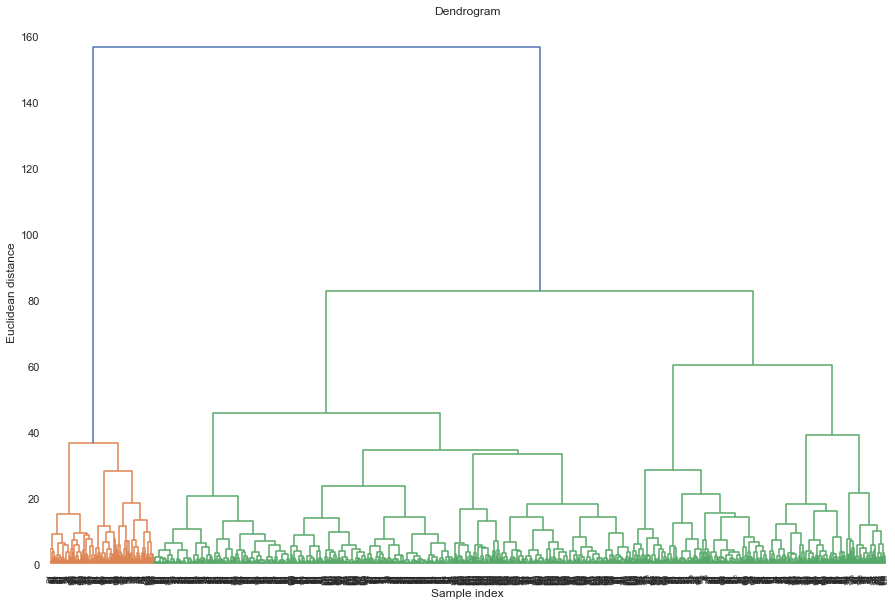

In [70]:
# Plot dendrogram
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(merge_pca, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [74]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit(merge_pca)
labels = cluster.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

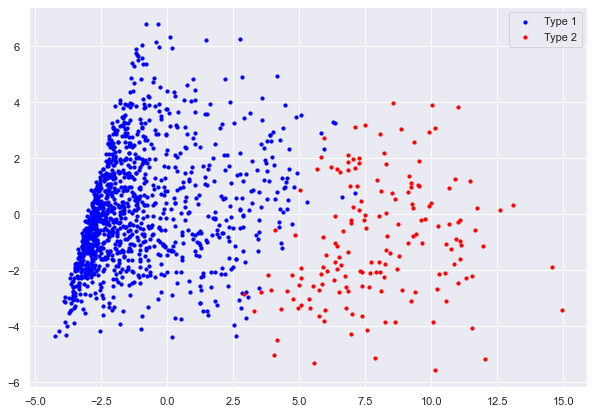

In [75]:
plt.figure(figsize=(10, 7))
plt.scatter(merge_pca[labels == 0, 0], merge_pca[labels == 0, 1], s = 10, c = 'blue', label = 'Type 1')
plt.scatter(merge_pca[labels == 1, 0], merge_pca[labels == 1, 1], s = 10, c = 'red', label = 'Type 2')
plt.legend()
plt.show()

# Logistic Regression